### **Read Data**

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
# Laptop GPU is busy with rendering screen ...
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  
import pickle
import glob
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
#data_dir = '../../Sensorfloors/summerschool2020/Robot_Data/train/*'


path_dataset = '/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/'

#data_dir = '/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/30092022/train/*'


os.chdir(path_dataset)

file_list = sorted(glob.glob(path_dataset + 'train/*.csv'))

print(os.getcwd())

# dfs = []
for input_file in file_list:
    print('Loading:', input_file)
#     dfs.append(pd.read_csv(input_file).drop(['data'], axis=1))

/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022
Loading: /media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/train/run1_diagonal.csv
Loading: /media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/train/run1_horizontal.csv
Loading: /media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/train/run1_vertical.csv
Loading: /media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/train/run2_diagonal.csv
Loading: /media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/train/run2_horizontal.csv
Loading: /media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/24102022/train/run2_vertical.csv
Loading: /media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/D

In [4]:
# import sys
# modules_dir = '../../Sensorfloors/REAML2020Hackathon/modules/'
# sys.path.insert(1, '../../Sensorfloors/REAML2020Hackathon/')

from modules_lib.data import KEYS as keys
from modules_lib.data import get_data_from_data_frame
from modules_lib.data import read_data

### Generate Pickle FIle

In [ ]:
# # #Test read file and build frames

# train = []
# n_files = len(file_list)
# y_list = []
# t_list = []
# X_list = []

# path_pickle = '/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/Coding/vicon_pos_converter_data/'

# os.chdir(path_pickle)

# offset = 2459877.0729167# 2410 13.45 #30.09 10.00: 2459852.9166667

# data_pickle_file = 'train_pickle_file_24102022_with_run4.pkl'

# for file_index, file in enumerate(file_list):
#     print('Loading:', file)
        
#     frames, y, t, X = read_data(file, offset)
            
#     X_list.append(X)
#     y_list.append(y)
#     t_list.append(t)
#     train.append(frames)
#     # write data
#     pickle_data = [train, y_list, X_list, t_list]
#     with open(data_pickle_file, 'wb') as handle:
#         pickle.dump(pickle_data, handle, protocol=3)


# print(len(X_list),len(y_list),len(t_list))

### Load Pickle FIle

In [5]:
train = []
n_files = len(file_list)
y_list = []
t_list = []
X_list = []
offset = 2459877.0729167

path_pickle = '/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/Coding/vicon_pos_converter_data/'

os.chdir(path_pickle)

data_pickle_file = 'train_pickle_file_24102022_with_run4.pkl'

if os.path.exists(data_pickle_file):
    print('Reloading from pickle file')
    with open(data_pickle_file, 'rb') as handle:
         train, y_list, X_list, t_list = pickle.load(handle)
else:
    for file_index, file in enumerate(file_list):
        print('Loading:', file)
        
        frames, y, t, X = read_data(file, offset)
            
        X_list.append(X)
        y_list.append(y)
        t_list.append(t)
        train.append(frames)
        
    # write data
    pickle_data = [train, y_list, X_list, t_list]
    with open(data_pickle_file, 'wb') as handle:
        pickle.dump(pickle_data, handle, protocol=3)

Reloading from pickle file


## Compute sensor normalization

In [6]:
#import numpy as np
# --------
# settings
# --------
norm_use_training_data = True
treat_sensors_equally = False
# --------

home_path = '/home/irfan-flw/6GEM/Coding/Vicon_Pos_Converter/'
os.chdir(home_path)

if treat_sensors_equally:
    norm_axes = (0, 1, 2)
else:
    norm_axes = 0

sensor_norm = np.zeros_like(X_list[0][0])
num_frames = 0
X_concat = np.concatenate(X_list, axis=0)
sensor_bias = np.nanmean(
    X_concat, axis=norm_axes, keepdims=True)[0]
sensor_std = np.nanstd(
    X_concat, axis=norm_axes, keepdims=True)[0] + 1e-7
print('Total number of frames:', X_concat.shape[0])
print(sensor_bias.shape)
print(sensor_std.shape)


#with open('data/normalization/norm_data_00000100.pkl', 'rb') as handle:
with open('data/normalization/sensor_normalization_eqFalse_trTrue_24102022_with_r4.pkl', 'rb') as handle:
    t_norm, X_norm = pickle.load(handle, encoding='latin1')
    sensor_bias2 = np.nanmean(
        X_norm, axis=norm_axes, keepdims=True)[0]
    sensor_std2 = np.nanstd(
        X_norm, axis=norm_axes, keepdims=True)[0] + 1e-7
    t_diff = np.diff(t_norm, axis=0)
    #plt.hist(t_diff, bins=30)
    
print(np.nanmean(X_concat, axis=(0, 1, 2)))
print(np.nanmean(X_norm, axis=(0, 1, 2)))

print(np.nanstd(X_concat, axis=(0, 1, 2)))
print(np.nanstd(X_norm, axis=(0, 1, 2)))

# save sensor normalization
if norm_use_training_data:
    pass
else:
    sensor_bias = sensor_bias2
    sensor_std = sensor_std2
    
# sensor_norm_file = 'data/normalization/sensor_normalization_eq{}_tr{}_09092022.pkl'.format(
#     treat_sensors_equally, norm_use_training_data)
sensor_norm_file = 'data/normalization/sensor_normalization_eqFalse_trTrue_24102022_with_r4.pkl'.format(
    treat_sensors_equally, norm_use_training_data)
if os.path.exists(sensor_norm_file):
    print('WARNING: File {} already exists. Aborting!'.format(
        sensor_norm_file))
else:
    with open(sensor_norm_file, 'wb') as handle:
        pickle.dump([sensor_bias, sensor_std], 
                    handle, protocol=3)

print('Sensor normalization file:', sensor_norm_file)


Total number of frames: 50349
(23, 15, 10)
(23, 15, 10)
[ 5.00462116e-02  1.18597324e-01  9.69793110e-01 -8.55238346e-01
  9.22393401e-01  7.23537146e-01  1.49858522e+01 -1.05495298e+00
  3.03916666e+01 -7.91686463e+01]
2.5439062684374294
[2.97403763e-02 5.03621507e-02 2.35886836e-01 1.23987289e+00
 6.80683857e-01 8.11797236e-01 9.25740252e+01 7.83481528e+01
 1.18388448e+02 2.10423172e+01]
4.501477064252892
Sensor normalization file: data/normalization/sensor_normalization_eqFalse_trTrue_24102022_with_r4.pkl


## Vicon Sensors

The sensors are arranged on a perfect rectangular 23x15 grid with distances of 1 in x-and y-direction.

strip_id     1.000
node_id      1.000
vicon_x    -11.185
vicon_y     -6.425
dtype: float64
strip_id    23.000
node_id     15.000
vicon_x     10.815
vicon_y      7.575
dtype: float64
345 345


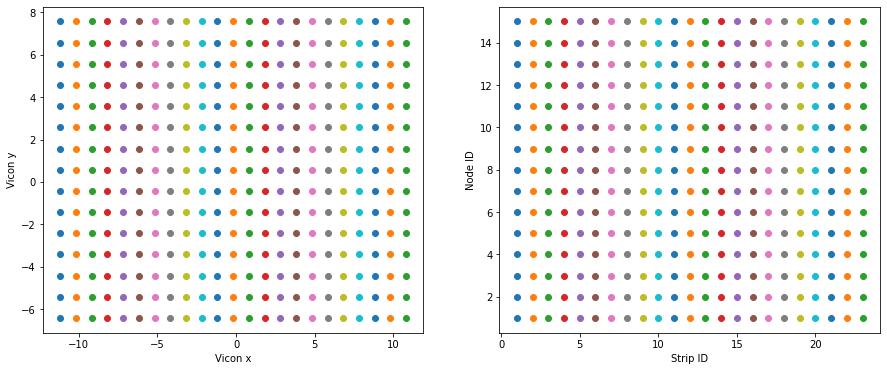

In [7]:
home_path = '/home/irfan-flw/6GEM/Coding/Vicon_Pos_Converter/'
os.chdir(home_path)

vicon_file = 'vicon_node_positions.csv'
df_vicon = pd.read_csv(vicon_file)

# get arrays of coordinates
vicon_coords = np.empty([23, 15, 2])
for strip_id in range(1, 24):
    for node_id in range(1, 16):
        mask = np.logical_and(
            df_vicon['strip_id'] == strip_id,
            df_vicon['node_id'] == node_id)
        vicon_coords[strip_id-1, node_id-1, 0] = df_vicon.vicon_x[mask]
        vicon_coords[strip_id-1, node_id-1, 1] = df_vicon.vicon_y[mask]
print(df_vicon.min())
print(df_vicon.max())
print(df_vicon.node_id.size, 23*15)
df_vicon.head()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
for strip_id in range(1, 24):
    mask = df_vicon.strip_id == strip_id
    #print(np.unique(np.diff(df_vicon.vicon_x[mask])))
    #print(np.unique(np.diff(df_vicon.vicon_y[mask])))
    if np.sum(mask) > 0:
        axes[0].scatter(df_vicon.vicon_x[mask], df_vicon.vicon_y[mask], 
                        label='Strip: {:02d}'.format(strip_id))
        axes[1].scatter(df_vicon.strip_id[mask], df_vicon.node_id[mask], 
                        label='Strip: {:02d}'.format(strip_id))
    axes[0].set_xlabel('Vicon x')
    axes[0].set_ylabel('Vicon y')
    axes[1].set_xlabel('Strip ID')
    axes[1].set_ylabel('Node ID')
    

## Define Helper Functions

In [8]:
decimals = 5

dict_coords = {}
dict_ids = {}
for index, row in df_vicon.T.items():
    x = np.round(row.vicon_x, decimals=decimals)
    y = np.round(row.vicon_y, decimals=decimals)
    dict_coords[(row.strip_id, row.node_id)] = (x, y)
    dict_ids[(x, y)] = (row.strip_id, row.node_id)
    
def get_ids(x, y):
    x = np.round(x, decimals=decimals)
    y = np.round(y, decimals=decimals)
    return dict_ids[(x, y)]

def get_coords(strip_id, row_id):
    if isinstance(strip_id, int):
        return dict_coords[(strip_id, row_id)]
    else:
        coords = [dict_coords[(s, r)] for s, r in zip(strip_id, row_id)]
        return np.array(coords).T


In [9]:
limit_dict = {
    'r': [-100, 0],
    'ax': [-0.01, 0.01],
    'ay': [-0.01, 0.01],
    'az': [-0.01, 0.01],
    'gx': [-5, 5],
    'gy': [-5, 5],
    'gz': [-5, 5],
    'mx': [-400, 400],
    'my': [-400, 400],
    'mz': [-400, 400],
}

key_index = {key:i for i, key in enumerate(keys)}

def normalize(X):
    X_norm = np.array(X)
    X_norm = (X_norm - sensor_bias) / sensor_std
    return X_norm

def get_data(run, index, key, normalized):
    y = y_list[run][index]
    X = X_list[run][index]
    
    data = np.array(X[..., key_index[key]])
    data[~np.isfinite(data)] = -float('inf')
    
    if normalized:
        bias = sensor_bias[..., key_index[key]]
        std = sensor_std[..., key_index[key]]
        data = (data - bias) / std
    
    return y, X, data

def print_frame(index, run=0, 
                ax=None, fig=None, add_colorbar=True, 
                key='r', key_as_title=False,
                normalized=True,
                y_pred=None,
                empty_data=False):
    if ax is None:
        fig, ax = plt.subplots()
    
    # get data
    y, X, data = get_data(run, index, key, normalized)
    
    # get limits
    if normalized:
        limits = {
            'vmax': 7,
            'vmin': -7,
        }
    else:
        limits = {}
        if key in limit_dict:
            limits = {
                'vmax': limit_dict[key][1],
                'vmin': limit_dict[key][0],
            }
        else:
            limits = {}

    if empty_data:
        data *= float('nan')
    
    pcmesh = ax.pcolormesh(
        vicon_coords[:, :, 0], 
        vicon_coords[:, :, 1], 
        data,
        cmap='RdBu',
        **limits)
    scat = ax.scatter(*y, marker='x', color='red', s=500)
    
    artists = [pcmesh, scat]
    if y_pred is not None:
        scat_pred = ax.scatter(
            *y_pred[index], marker='+', color='green', s=500)
        artists.append(scat_pred)
    
    if add_colorbar:
        fig.colorbar(pcmesh)
    if key_as_title:
        title = ax.set_title(key)
    else:
        title = ax.set_title('Run {} | Frame: {:05d}'.format(
            run, index))
    if ax is None:
        plt.show()
        plt.close(fig)
    return artists, ax, fig

def print_complete_frame(index, run=0, axes=None, 
                         fig=None, add_colorbar=True,
                         normalized=True,
                         empty_data=False,
                         add_title=True,
                         y_pred=None,
                        ):
    if axes is None:
        fig, axes = plt.subplots(2, 5, figsize=(20, 5))
    
    artists_list = []
    for ax, key in zip(axes.flatten(), keys):
        artists, _, _ = print_frame(
            index=index, run=run, ax=ax, fig=fig,
            add_colorbar=False, key=key,
            key_as_title=True, 
            normalized=normalized,
            y_pred=y_pred,
            empty_data=empty_data)
        artists_list.append(artists)
    if add_title:
        title = fig.suptitle('Run {} | Frame: {:05d}'.format(
            run, index))
    else:
        title = None
    fig.tight_layout()
    if axes is None:
        plt.show()
        plt.close(fig)
    return artists_list, title, fig, axes
    

In [ ]:
for i in range(1000, 1010):
    print_frame(i, run=0, key='r')
    print_complete_frame(i, run=0)


In [10]:
def create_y_gif(y_pred, y_true=None, 
                 file_name='plots/gif_y_prediction.gif'):
    fig, ax = plt.subplots()
    fig.set_tight_layout(True)
    
    num_frames = len(y_pred)
    
    plot_dir = os.path.dirname(file_name)
    if not os.path.isdir(plot_dir):
        print('Creating directory:', plot_dir)
        os.makedirs(plot_dir)
    
    # Plot axis that persists (isn't redrawn)
    title = ax.set_title('Frame: {:05d}'.format(0))
    ax.set_xlabel('Vicon X [meter]')
    ax.set_ylabel('Vicon Y [meter]')
    min_x = np.min(vicon_coords[..., 0])
    max_x = np.max(vicon_coords[..., 0])
    min_y = np.min(vicon_coords[..., 1])
    max_y = np.max(vicon_coords[..., 1])
    ax.set_xlim(min_x - 1, max_x + 1)
    ax.set_ylim(min_y - 1, max_y + 1)
    
    artists = [ax, title]
    
    if y_pred is not None:
        scat_pred = ax.scatter(
            0, 0, marker='+', color='green', s=500,
            label='Prediction',
        )
        artists.append(scat_pred)
    if y_true is not None:
        scat_true = ax.scatter(
            0, 0, marker='+', color='orange', s=500,
            label='True',
        )
        artists.append(scat_true)
    ax.legend()
    
    def init():
        return artists

    def update(i):
        # Update the line and the axes (with a new xlabel). Return a tuple of
        # "artists" that have to be redrawn for this frame.
        cnt = 2
        if y_pred is not None:
            scat_pred = artists[cnt]
            cnt += 1
            scat_pred.set_offsets(y_pred[i])
        if y_true is not None:
            scat_true = artists[cnt]
            cnt += 1
            scat_true.set_offsets(y_true[i])
        artists[1].set_text('Frame: {:05d}'.format(i))
        #artists[0].set_xlim(min_x - 1, max_x + 1)
        #artists[0].set_ylim(min_y - 1, max_y + 1)
        return artists

    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(
        fig, update, frames=tqdm(np.arange(0, num_frames)), 
        interval=200, blit=False, init_func=init)
    anim.save(file_name, dpi=80, writer='imagemagick')

def create_gif(key, run, file_name='plots/gif_run{run}_{key}.gif'):
    fig, ax = plt.subplots()
    fig.set_tight_layout(True)
    
    file_name = file_name.format(run=run, key=key)
    plot_dir = os.path.dirname(file_name)
    if not os.path.isdir(plot_dir):
        print('Creating directory:', plot_dir)
        os.makedirs(plot_dir)

    # Plot a scatter that persists (isn't redrawn) and the initial line.
    print_frame(i, run=run, ax=ax, fig=fig, key=key)

    def update(i):
        # Update the line and the axes (with a new xlabel). Return a tuple of
        # "artists" that have to be redrawn for this frame.
        artists = print_frame(
            i, run=run, ax=ax, fig=fig, 
            add_colorbar=False, key=key)
        return artists, ax

    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=tqdm(np.arange(0, min(100, len(frames)))), 
                         interval=200)
    anim.save(file_name, dpi=80, writer='imagemagick')

def create_complete_gif(run, file_name='plots/gif_run{run}{norm}.gif',
                        normalized=True, num_frames=100):
    fig, axes = plt.subplots(2, 5, figsize=(20, 5))
    fig.set_tight_layout(True)
    
    if normalized:
        norm = '_normalized'
    else:
        norm = ''
    file_name = file_name.format(run=run, norm=norm)
    plot_dir = os.path.dirname(file_name)
    if not os.path.isdir(plot_dir):
        print('Creating directory:', plot_dir)
        os.makedirs(plot_dir)

    # Plot a scatter that persists (isn't redrawn) and the initial line.
    print_complete_frame(i, run=run, axes=axes, fig=fig, 
                         normalized=normalized)
    def init():
        pass
    
    def update(i):
        # Update the line and the axes (with a new xlabel). Return a tuple of
        # "artists" that have to be redrawn for this frame.
        print_complete_frame(
            i, run=run, axes=axes, fig=fig,
            normalized=normalized)

    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(
        fig, update, 
        frames=tqdm(np.arange(0, min(num_frames, len(y_list[run])))), 
        interval=200, init_func=init)
    anim.save(file_name, dpi=80, writer='imagemagick')
    plt.close(fig)

def create_complete_gif2(run, file_name='plots/gif_run{run}{norm}.gif',
                         normalized=True, y_pred=None,
                         num_frames=100):
    fig, axes = plt.subplots(2, 5, figsize=(20, 5))
    fig.set_tight_layout(True)
    
    if normalized:
        norm = '_normalized'
    else:
        norm = ''
    file_name = file_name.format(run=run, norm=norm)
    plot_dir = os.path.dirname(file_name)
    if not os.path.isdir(plot_dir):
        print('Creating directory:', plot_dir)
        os.makedirs(plot_dir)

    # Plot a scatter that persists (isn't redrawn) and the initial line.
    artists_list, title, _, _ = print_complete_frame(
        0, run=run, axes=axes, fig=fig, 
        y_pred=y_pred,
        normalized=normalized, 
        add_title=False,
        empty_data=True)
    title = axes[0, 0].text(
        .45, 0.9, '', transform = axes[0, 0].transAxes)
    pcmesh_list = [a[0] for a in artists_list]
    scat_list = [a[1] for a in artists_list]
    all_artists = list(pcmesh_list)
    all_artists.extend(scat_list)
    if y_pred is not None:
        scat_pred_list = [a[2] for a in artists_list]
        all_artists.extend(scat_pred_list)
    all_artists.append(title)
    
    def init():
        return all_artists

    def update(i):
        # Update the line and the axes (with a new xlabel). Return a tuple of
        # "artists" that have to be redrawn for this frame.
        for j, key in enumerate(keys):
            # get new data
            y, X, data = get_data(
                run=run, index=i, key=key, normalized=normalized)
            
            # set new data
            if y_pred is None:
                pcmesh, scat = artists_list[j]
            else:
                pcmesh, scat, scat_pred = artists_list[j]
                scat_pred.set_offsets(
                    [y_pred[i, 0], y_pred[i, 1]])
            pcmesh.set_array(data[:-1,:-1].ravel())
            scat.set_offsets([y[0], y[1]])
            
            title.set_text('Run {} | Frame: {:05d}'.format(
                run, i))

        return all_artists

    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(
        fig, update, 
        frames=tqdm(np.arange(0, min(num_frames, len(y_list[run])))), 
        interval=200, blit=True, init_func=init)
    anim.save(file_name, dpi=80, writer='imagemagick')
    plt.close(fig)

## Investigate Value Distributions

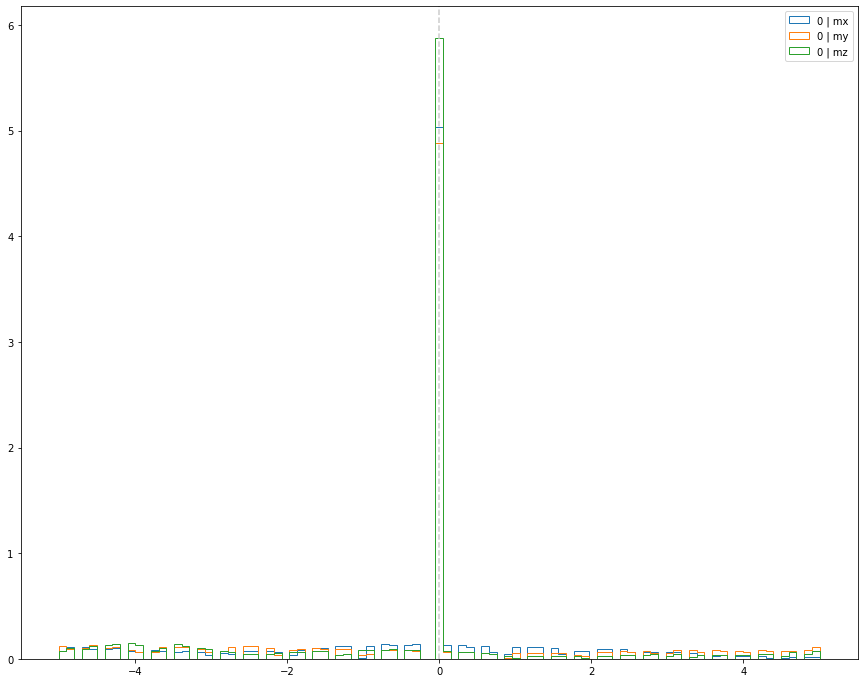

In [14]:
bins = np.linspace(-5, 5, 100)

fig, ax = plt.subplots(figsize=(15, 12))
for run in range(1):
    for key in keys[6:9]:
        X_norm = normalize(X_list[0])
        X_norm = X_list[run]
        ax.hist(X_norm[..., key_index[key]].flatten(),
                bins=bins, histtype='step',
                label='{} | {}'.format(run, key),
                density=True,
               )
ax.legend()
ax.axvline(0, color='0.8', ls='--')
#ax.set_yscale('log')
        

#### Investigate Time Steps

Times between steps seems to be roughly constant and around 0.23 seconds. 

In [34]:
#Convert unix timestamps to Julian date format
def getJulianFromUnix(unixSecs):
    return (unixSecs/86400.0)+2440587.5

run = 9
if False:
    num_frames = len(train[run])
    times = np.empty(num_frames)
    offset = 2459852.9166667  #Julian epoch for 03.08.2022//Julian epoch for 5th August 2020: 2459067.00
    for i in tqdm(range(num_frames)):
        #time_stamps = train[run][i]['data'].timestamp
        time_stamps = pd.to_datetime(train[run][i]['data'].timestamp,unit='s')
        time_i = []
        for time_stamp in time_stamps:
            time_stamp = getJulianFromUnix(time_stamp)
            time_i.append(time_stamp - offset)
        time_i_avg = np.mean([a for j,a in enumerate(time_i) if a>0])
        times[i] = time_i_avg  * 24 * 60 * 60
else:
    times = t_list[run][:, 0]
    


Run 0: 0-0.175 (0.025-0.1)
Run 1: 0-0.175 (0.18)
Run 2: 0-0.175 (0.16)
Run 3: 0-0.185 (0-0.2)
Run 4: 0-0.19 (0.025-0.125)
Run 5: 0.02-0.14 (0.04-0.12)
Run 6: 0-0.175 (0.025-0.075)
Run 7: 0-0.19 (0.0-0.19)
Run 8: 0-0.19 (0.0-0.19)
Run 9: 0-0.15 (0.0-0.06)

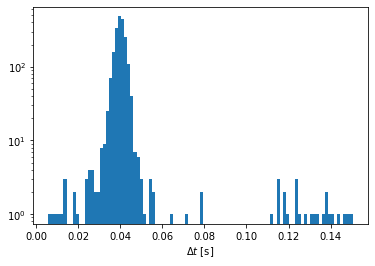

In [35]:
time_diffs = np.diff(times)
plt.hist(time_diffs, bins=100)
plt.xlabel('$\Delta t$ [s]')
plt.yscale('log')
plt.show()


## Fit Kernel Density for Velocity and Acceleration

In [36]:
from sklearn.neighbors import KernelDensity
from scipy.optimize import minimize
from scipy.interpolate import UnivariateSpline
from egenerator.utils import basis_functions
from keras.utils import GeneratorEnqueuer, to_categorical, np_utils

from modules_lib.data import get_vel_and_acc
#TF_ENABLE_ONEDNN_OPTS=0

def get_kde_data(every_nth):
    y_train_list = []
    t_train_list = []
    for train_index in range(n_files):
        t_train = np.array(t_list[train_index])[::every_nth]
        y_train = np.array(y_list[train_index])[::every_nth]
        t_train_list.append(t_train)
        y_train_list.append(y_train)

    y = np.concatenate(y_train_list, axis=0)
    t = np.concatenate(t_train_list, axis=0)
    return y, t

def build_kde(every_nth, 
              kernel='linear', 
              bandwidth=0.005,
              atol=1e-2,
              rtol=1e-1,
              sparsity=1, #sparsity=1,
             ):
    pos, t = get_kde_data(every_nth)
    vel_abs, acc_abs, acc_parallel, acc_perp = \
        get_vel_and_acc(pos, t)

    acc_perp_abs = np.abs(acc_perp)

    kde_data = np.concatenate(
        [
            #acc_perp_abs, 
            #acc_parallel, 
            vel_abs,
        ],
        axis=1,
    )
    #print(kde_data, kde_data.shape)
    
    # shuffle so that randomly chosing points via sparsity
    # obtains uncorrelated points
    np.random.shuffle(kde_data)
    
    kde = KernelDensity(
        kernel=kernel, bandwidth=bandwidth,
        atol=atol, rtol=rtol,
    ).fit(kde_data[::sparsity])
    return kde

def eval_mixture_model(x, params):
    
    # normalize scale
    params[:, 3] /= np.sum(params[:, 3])

    llh = np.log(np.sum(basis_functions.asymmetric_gauss(
        x, 
        mu=params[:, 0], 
        sigma=params[:, 1], 
        r=params[:, 2],
    ) * params[:, 3], axis=1))
    return llh

def get_mixture_model(x, n=3):
    """Get a mixture model for the 1D data x
    Parameters:
    -----------
    x: array_like
        The data for which to build the mixture model.
    n: int
        The number of asymmetric Gaussians to use.
        
    Returns:
    -------
    function:
        The mixture model function:
        f(x) -> log prob
    """
    def loss(params):
        params = np.reshape(params, [n, 4])
        
        # make sure sigma and r are positive
        if (params[:, 1:3] <= 1e-8).any():
            return np.inf
        
        neg_llh = -eval_mixture_model(x, params)
        return np.sum(neg_llh)
    
    params = np.empty([n, 4])
    params[:, 0] = np.linspace(0, 0.707, n)
    #params[:, 0] = np.linspace(0, 3.05, n)
    params[:, 1:] = 1.
    params[0, 1] = 0.0001
    params[0, 2] = 100
    params[-1, 1] = 100
    params[-1, 2] = 0.01
    params = params.flatten()
    result = minimize(
        fun=loss,
        x0=params,
        method='Nelder-Mead',
    )
    params = np.reshape(result.x, [n, 4])
    
    def mixture_model(x):
        return eval_mixture_model(x, params)
    
    return mixture_model
    
def build_mm(every_nth, n=1):
    pos, t = get_kde_data(every_nth)
    vel_abs, acc_abs, acc_parallel, acc_perp = \
        get_vel_and_acc(pos, t)

    acc_perp_abs = np.abs(acc_perp)
    
    mm = get_mixture_model(vel_abs, n)
    return mm

def build_spline(every_nth):
    pos, t = get_kde_data(every_nth)
    vel_abs, acc_abs, acc_parallel, acc_perp = \
        get_vel_and_acc(pos, t)

    vel_abs_sorted = np.sort(vel_abs[:, 0])
    x = vel_abs_sorted[::100]
    
    hist, bin_edges = np.histogram(vel_abs, bins=x, density=True)
    x_mids = bin_edges[:-1] + np.diff(bin_edges)*0.5
    weights = np.ones_like(x_mids)
   # weights[x_mids < 0.01] = 10
   # weights[np.abs(x_mids - 0.7105) < 0.02 ] = 10
    
    s =  1e6 * len(weights) / len(vel_abs)**2
    
    spline = UnivariateSpline(
        x_mids, hist, s=s, k=2, ext=1, w=weights)
    return spline

kdes = [build_kde(e) for e in tqdm(range(1, 26))]
splines = [build_spline(e) for e in tqdm(range(1, 26))]
#mixture_models = {e: build_mm(e) for e in tqdm(range(1, 13))}

def write_to_file(data, file_name):
    file_dir = os.path.dirname(file_name)

    if not os.path.exists(file_dir):
        print('Creating directory:', file_dir)
        os.makedirs(file_dir)

    with open(file_name, 'wb') as handle:
        pickle.dump(data, handle, protocol=2)
        
# ------------------------------
# write kdes and splines to file
# ------------------------------
write_to_file(kdes, 'data/kdes/kde_vel_abs_24102022.pkl')
write_to_file(splines, 'data/splines/spline_vel_abs_24102022.pkl')


2022-10-31 12:50:26.365266: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

kde_data (25177, 3)


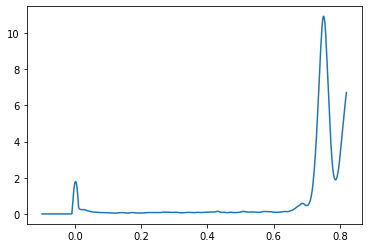

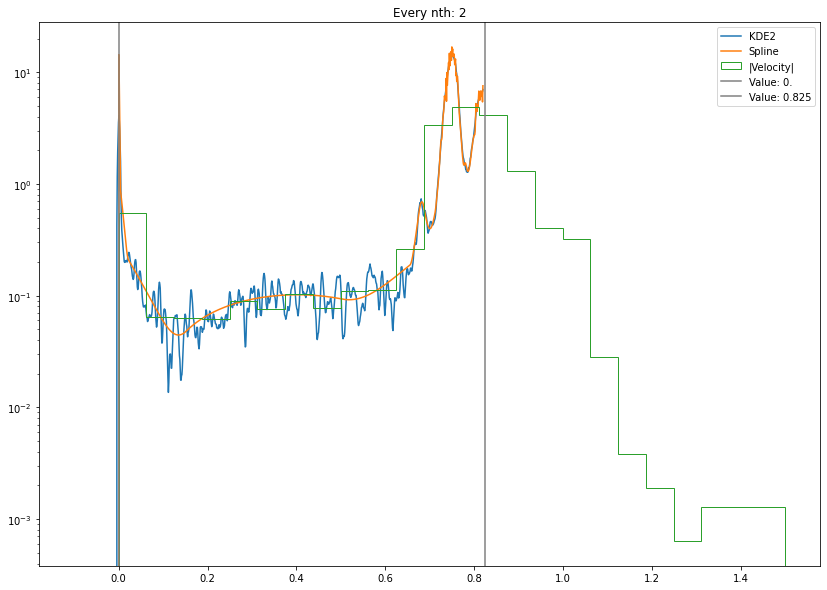

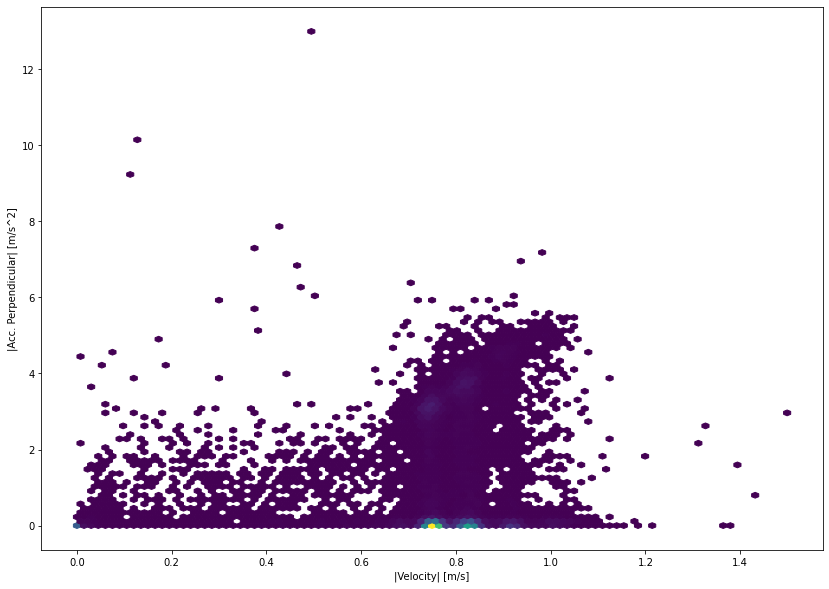

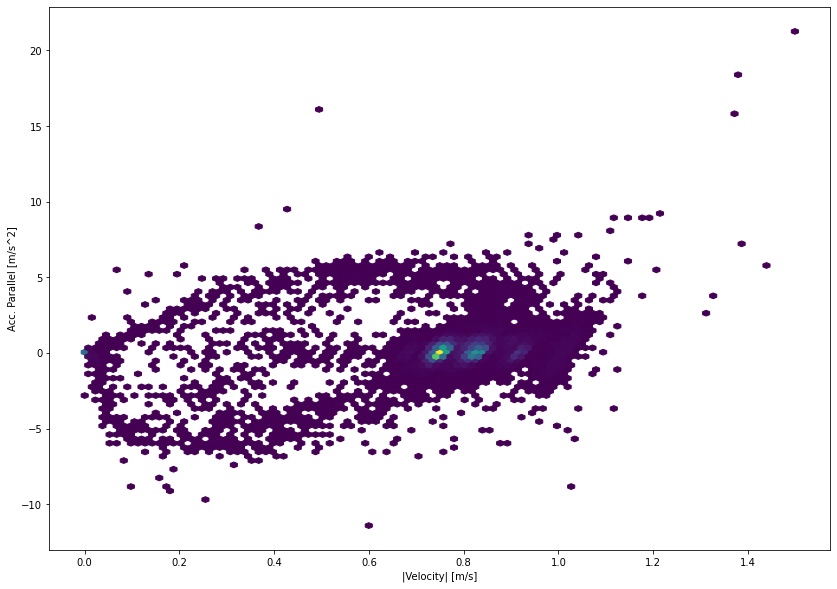

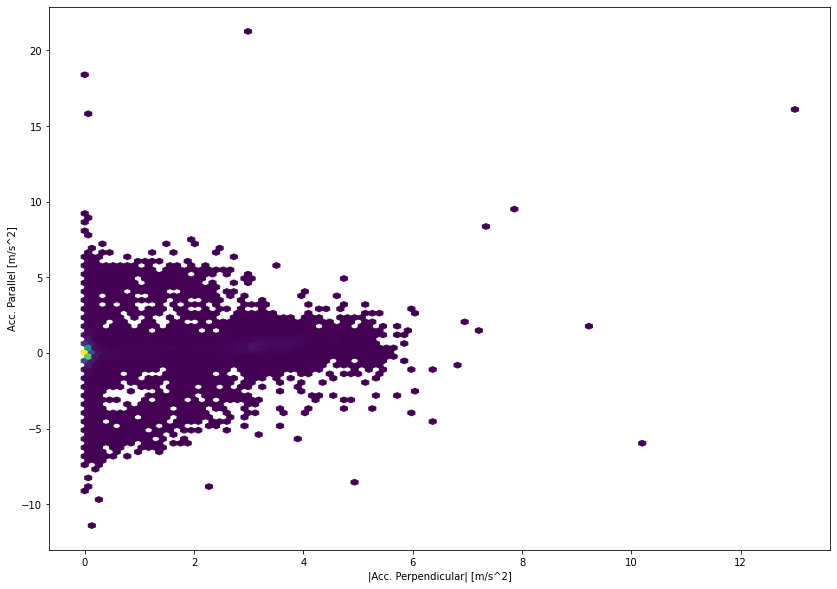

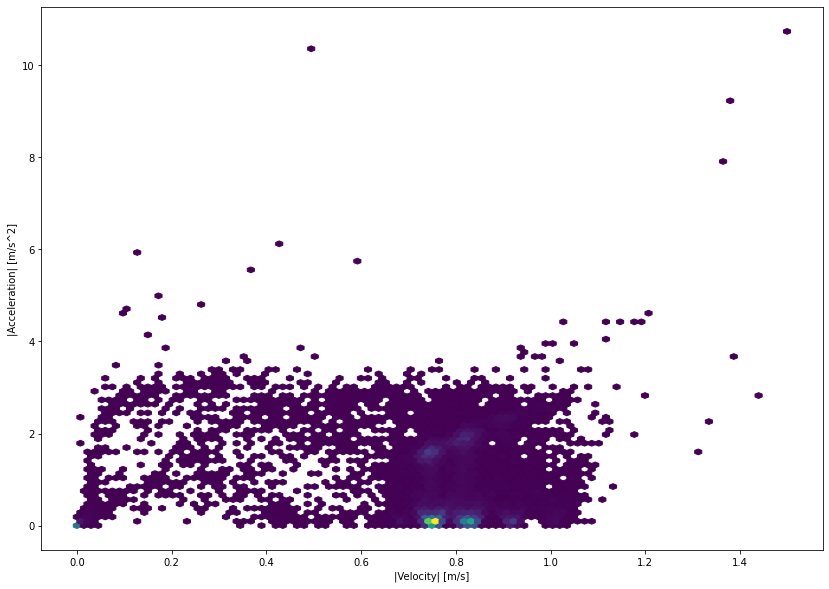

In [37]:
nth = 2

pos, t = get_kde_data(nth)
vel_abs, acc_abs, acc_parallel, acc_perp = \
    get_vel_and_acc(pos, t)

acc_perp_abs = np.abs(acc_perp)

kde_data = np.concatenate(
    [acc_perp_abs, acc_parallel, vel_abs],
    axis=1,
)
print('kde_data', kde_data.shape)

kde = KernelDensity(
    kernel='epanechnikov', bandwidth=0.01).fit(vel_abs)
    #kernel='gaussian', bandwidth=0.0000015).fit(vel_abs)

x = np.linspace(-0.1, 0.82, 1000)
bins = np.linspace(-0.1, 0.82, 100)
plt.plot(x, np.exp(kde.score_samples(x[:, None])), label='KDE')
plt.figure(figsize=(14, 10))
plt.plot(x, np.exp(kdes[nth].score_samples(x[:, None])), label='KDE2')
plt.plot(x, splines[nth](x), label='Spline')
#plt.plot(x, np.exp(mixture_models[1](x[:, None])), label='MM')

#plt.figure(figsize=(14, 10))
plt.hist(vel_abs, bins='doane', label='|Velocity|',
         density=True, histtype='step')
#plt.hist(acc_parallel, bins=100, label='Par. Acc.',
#         density=True, histtype='step')
#plt.hist(acc_perp_abs, bins=100, label='|Perp. Acc.|',
#         density=True, histtype='step')
#plt.hist(acc_abs, bins=100, label='Abs Acc.',
#         density=True, histtype='step')
#plt.ylim(0, 10)
#plt.figure(figsize=(14, 10))
plt.axvline(0., color='0.5', label='Value: 0.')
#plt.axvline(0.7105, color='0.5', label='Value: 0.7105')
plt.axvline(0.825, color='0.5', label='Value: 0.825')
#plt.xlim(.69, 0.73)
#plt.xlim(-0.001, 0.1)
plt.yscale('log')
plt.title('Every nth: {}'.format(nth))
plt.legend()
plt.show()

plt.figure(figsize=(14, 10))
#plt.hexbin(vel_abs[:-1], acc_perp[1:], mincnt=1)
plt.hexbin(vel_abs, np.abs(acc_perp), mincnt=1)
plt.xlabel('|Velocity| [m/s]')
plt.ylabel('|Acc. Perpendicular| [m/s^2]')
plt.show()

plt.figure(figsize=(14, 10))
plt.hexbin(vel_abs, acc_parallel, mincnt=1)
plt.xlabel('|Velocity| [m/s]')
plt.ylabel('Acc. Parallel [m/s^2]')
plt.show()

plt.figure(figsize=(14, 10))
plt.hexbin(np.abs(acc_perp), acc_parallel, mincnt=1)
plt.xlabel('|Acc. Perpendicular| [m/s^2]')
plt.ylabel('Acc. Parallel [m/s^2]')
plt.show()

plt.figure(figsize=(14, 10))
plt.hexbin(vel_abs, acc_abs, mincnt=1)
plt.xlabel('|Velocity| [m/s]')
plt.ylabel('|Acceleration| [m/s^2]')
plt.show()


## Collect Data for sensor-based Model

In [38]:
every_nth = 2

X_train_list = []
X_llh_list = []
y_vel_list = []
y_acc_list = []
y_acc_parallel_list = []
y_acc_perp_list = []
for train_index in range(8):
    X_train = np.array(X_list[train_index])[::every_nth]
    t_train = np.array(t_list[train_index])[::every_nth]
    y_train = np.array(y_list[train_index])[::every_nth]
    
    vel_abs, acc_abs, acc_parallel, acc_perp = \
        get_vel_and_acc(y_train, t_train)
    
    dt = np.diff(t_train, axis=0)

    y_pos = np.array(y_train)
    y_vel = np.zeros_like(y_pos)
    y_vel[1:] = np.diff(y_pos, axis=0) / dt
    y_acc = np.zeros_like(y_pos)
    y_acc[1:] = np.diff(y_vel, axis=0) / dt

    # compute relative positions to each sensor
    y_pos_rel = (
        np.expand_dims(vicon_coords, axis=0) - 
        np.reshape(y_pos, [-1, 1, 1, 2])
    )


    # gather input data for LLH model
    y_vel_exp = np.tile(np.reshape(y_vel, [-1, 1, 1, 2]),
                        [1, 23, 15, 1])
    X_llh = np.concatenate([y_pos_rel, y_vel_exp], axis=-1)
    
    X_train_list.append(X_train)
    X_llh_list.append(X_llh)
    y_vel_list.append(y_vel)
    y_acc_list.append(y_acc)
    y_acc_perp_list.append(acc_perp)
    y_acc_parallel_list.append(acc_parallel)

X_llh = np.concatenate(X_llh_list, axis=0)
X_train = np.concatenate(X_train_list, axis=0)
y_acc = np.concatenate(y_acc_list, axis=0)
y_vel = np.concatenate(y_vel_list, axis=0)
y_acc_parallel = np.concatenate(y_acc_parallel_list, axis=0)
y_acc_perp = np.concatenate(y_acc_perp_list, axis=0)

X_llh_mean = np.mean(X_llh, axis=0, keepdims=True)
X_llh_std = np.std(X_llh, axis=0, keepdims=True)

X_train_norm = (X_train - sensor_bias) / (sensor_std*10)
# set NaN values to 0
X_train[~np.isfinite(X_train)] = 0.
X_train_norm[~np.isfinite(X_train)] = 0.

print('vicon_coords', vicon_coords.shape)
print('y_pos_rel', y_pos_rel.shape)
print('y_vel', y_vel.shape)
print('y_pos', y_pos.shape)
print('y_vel_exp', y_vel_exp.shape)
print('X_llh', X_llh.shape)
print('X_llh_mean', X_llh_mean.shape)

vicon_coords (23, 15, 2)
y_pos_rel (2528, 23, 15, 2)
y_vel (21455, 2)
y_pos (2528, 2)
y_vel_exp (2528, 23, 15, 2)
X_llh (21455, 23, 15, 4)
X_llh_mean (1, 23, 15, 4)


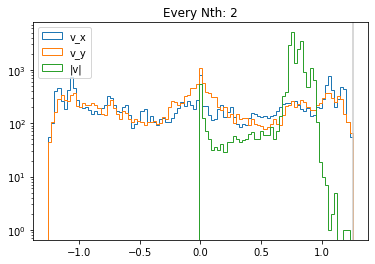

In [39]:
bins = np.linspace(-1.25, 1.25, 100)
#bins = np.linspace(0.99, 1.03, 100)
plt.hist(y_vel[:, 0], bins=bins, label='v_x',
         histtype='step')
plt.hist(y_vel[:, 1], bins=bins, label='v_y',
         histtype='step')
plt.hist(np.hypot(y_vel[:, 0], y_vel[:, 1]) / np.sqrt(2.), 
         bins=bins, label='|v|',
         histtype='step')
plt.axvline(1.25, color='0.8')
plt.legend()
plt.title('Every Nth: {}'.format(every_nth))
plt.yscale('log')

**Investigate changes in velocity (Acceleration)**

every_nth: 2
2.563 |acc|
4.207 |acc_perp|
4.922 -acc parallel
4.765 +acc parallel


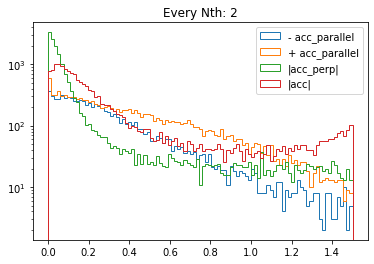

In [40]:
bins = np.linspace(-1.5, 1.5, 100)
bins = np.linspace(0, 1.5, 100)
#plt.hist(y_acc[:, 0], bins=bins, label='acc_x',
#         histtype='step')
#plt.hist(y_acc[:, 1], bins=bins, label='acc_y',
#         histtype='step')
#plt.hist(y_acc_parallel, bins=bins, label='acc_parallel',
#         histtype='step')
plt.hist(-y_acc_parallel[y_acc_parallel < 0], bins=bins, 
         label='- acc_parallel', histtype='step')
plt.hist(y_acc_parallel[y_acc_parallel > 0], bins=bins, 
         label='+ acc_parallel', histtype='step')
#plt.hist(-y_acc_parallel, bins=bins, label='-acc_parallel',
#         histtype='step')
#plt.hist(y_acc_perp, bins=bins, label='acc_perp',
#         histtype='step')
plt.hist(np.abs(y_acc_perp), bins=bins, label='|acc_perp|',
         histtype='step')
plt.hist(np.hypot(y_acc[:, 0], y_acc[:, 1]) / np.sqrt(2.), 
         bins=bins, label='|acc|',
         histtype='step')
plt.legend()
plt.title('Every Nth: {}'.format(every_nth))
plt.yscale('log')

def print_q(label, values):
    try:
        values = values[:, 0]
    except:
        pass
    values = sorted(values)
    num = int(len(values) * 0.975)
    print('{:3.3f} {}'.format(values[num], label))

print('every_nth:', every_nth )
print_q('|acc|', np.hypot(y_acc[:, 0], y_acc[:, 1]) / np.sqrt(2.))
print_q('|acc_perp|', np.abs(y_acc_perp))
print_q('-acc parallel', 
        -y_acc_parallel[y_acc_parallel <= 0])
print_q('+acc parallel', 
        +y_acc_parallel[y_acc_parallel >= 0])


**Investigate Regularization Function**

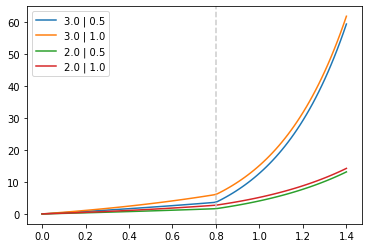

In [41]:
from modules_lib.model import reg_acc_abs

x = np.linspace(0, 1.4, 100)
for h in [3., 2.]:
    for s in [0.5, 1.0]:
        plt.plot(x, reg_acc_abs(x, 0.8, h, s),
                 label='{:3.1f} | {:3.1f}'.format(h, s))
plt.axvline(0.8, color='0.8', ls='--')
plt.legend()
#plt.yscale('log')


1.4990706127287157
10.734807333373965


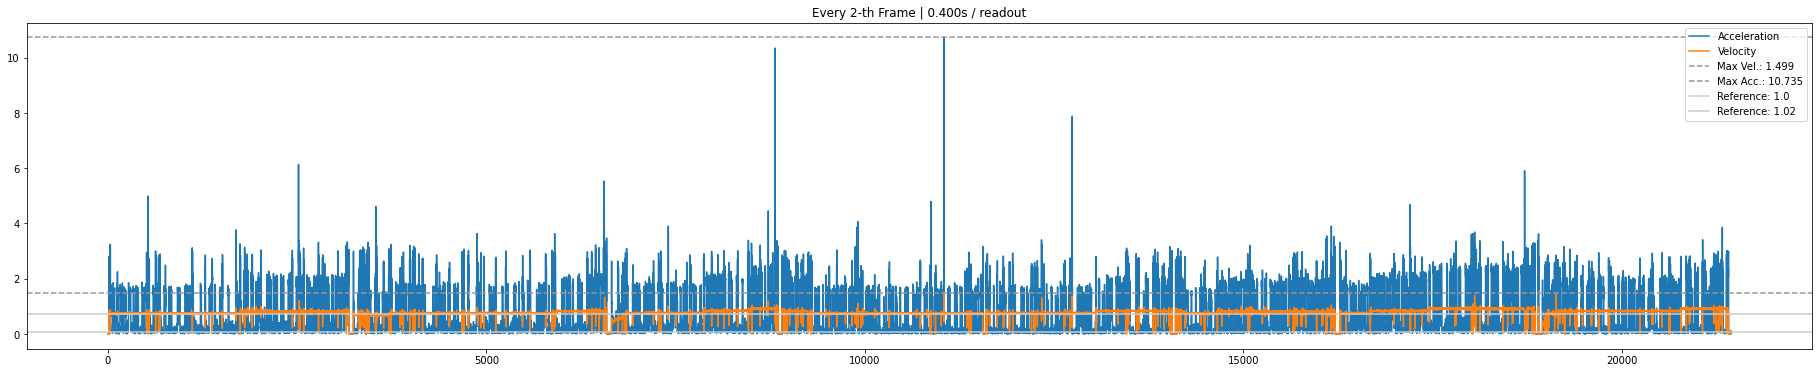

In [42]:
# start index
s = 10
fig, ax = plt.subplots(figsize=(32, 6))
ax.plot(np.hypot(y_acc[s:, 0], y_acc[s:, 1]) / np.sqrt(2.), 
         label='Acceleration')
ax.plot(np.hypot(y_vel[s:, 0], y_vel[s:, 1]) / np.sqrt(2.), 
         label='Velocity')
max_acc = np.max(np.hypot(y_acc[s:, 0], y_acc[s:, 1]) / np.sqrt(2.))
max_vel = np.max(np.hypot(y_vel[s:, 0], y_vel[s:, 1]) / np.sqrt(2.))
ax.axhline(max_vel, ls='--', color='0.6', 
           label='Max Vel.: {:3.3f}'.format(max_vel))
ax.axhline(max_acc, ls='--', color='0.6', 
           label='Max Acc.: {:3.3f}'.format(max_acc))
ax.axhline(.707, ls='-', color='.8', label='Reference: 1.0')
ax.axhline(.0717, ls='-', color='.8', label='Reference: 1.02')
ax.legend()
ax.set_title('Every {}-th Frame | {:3.3f}s / readout'.format(
    every_nth, 0.2*every_nth))
print(max_vel)
print(max_acc)


(21455, 23, 15)


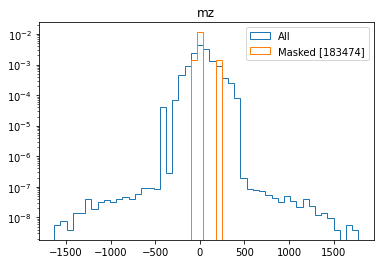

In [43]:
X_train.shape
X_llh.shape

mask = np.logical_and(
    np.abs(X_llh[..., 0]) < 1.5,
    np.abs(X_llh[..., 1]) < 1.5,
)
mask = np.logical_and(
    mask,
    np.hypot(X_llh[..., 2], X_llh[..., 3]) / np.sqrt(2.) > 0.2,
    #np.hypot(X_llh[..., 2], X_llh[..., 3]) / np.sqrt(2.) < 0.01,
)
print(mask.shape)

index = 8
bins = np.linspace(np.nanmin(X_train[..., index]), 
                   np.nanmax(X_train[..., index]), 50)
plt.hist(X_train[..., index].flatten(), 
         histtype='step',
         bins=bins, label='All', density=True)
plt.hist(X_train[mask][index], 
         histtype='step',
         bins=bins, 
         label='Masked [{}]'.format(np.sum(mask)), 
         density=True)
plt.legend()
plt.title(keys[index])
plt.yscale('log')
